In [ ]:
import pandas as pd
df=pd.read_csv("../data/MR_1.csv")

In [2]:
#AS from kmena i know that data is already clean i am not doing preprocessing here

In [3]:
X=df

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test = train_test_split(X,test_size=0.3,random_state=7239847)

Maximum dendrogram height: 33.02
Proposed middle line y-coordinate: 16.51


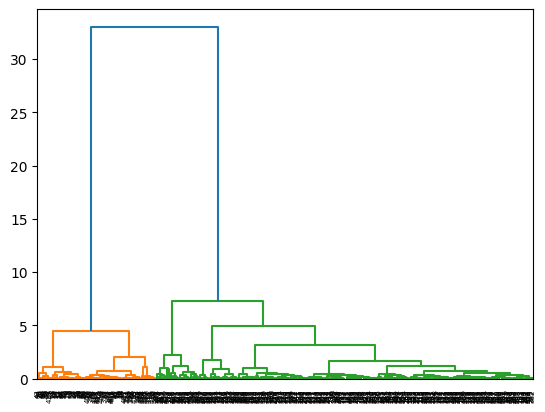

In [7]:
dend = shc.dendrogram(shc.linkage(X.iloc[:500,:], method='ward'))
# Calculate the maximum y-coordinate (height) from the dendrogram
# The 'dcoord' in the dendrogram output contains the y-coordinates of the vertical segments.
max_y_coord = max(val for sublist in dend['dcoord'] for val in sublist)

# Set the y-coordinate for the middle line at half of the maximum height
middle_line_y = max_y_coord / 2

print(f"Maximum dendrogram height: {max_y_coord:.2f}")
print(f"Proposed middle line y-coordinate: {middle_line_y:.2f}")

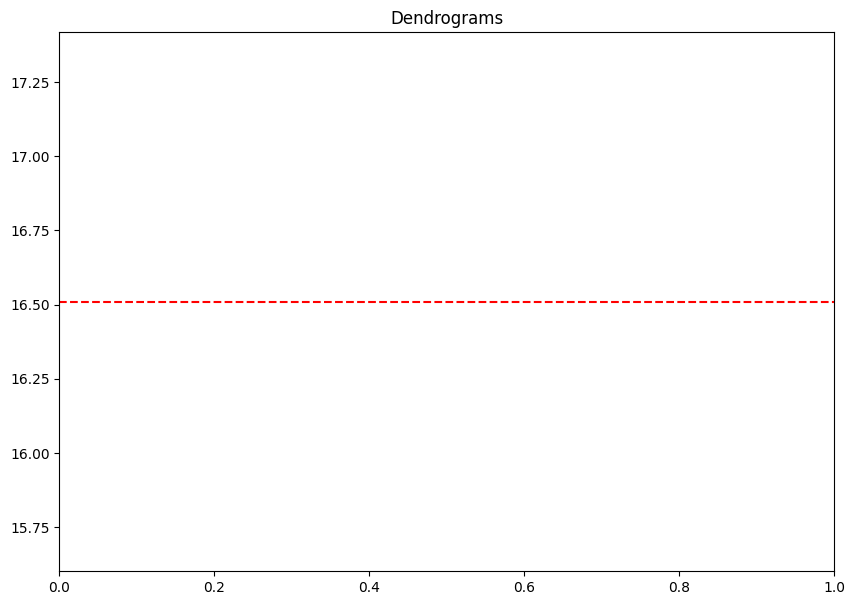

In [8]:
# creating a dendogram
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")

plt.axhline(y=middle_line_y, color='r', linestyle='--')


In [10]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(2)
ac.fit(X_train.iloc[:500,:])

,n_clusters,2
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


In [11]:
ac.fit_predict(X_test.iloc[:500,:])

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,

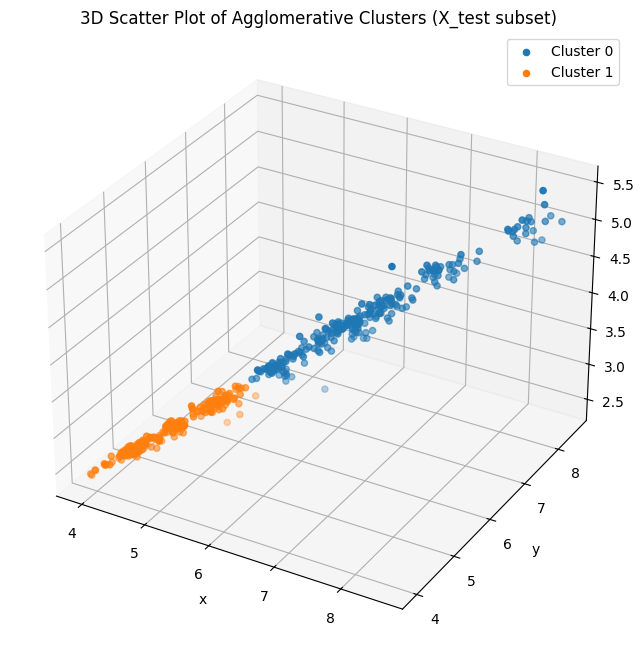

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Get the cluster labels for the X_test subset used for prediction
# This output was from ac.fit_predict(X_test.iloc[:500,:])
cluster_labels = ac.fit_predict(X_test.iloc[:500,:])

# Select the corresponding data points
plot_data = X_test.iloc[:500,:].copy()
plot_data['cluster'] = cluster_labels

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster_id in sorted(plot_data['cluster'].unique()):
    cluster_subset = plot_data[plot_data['cluster'] == cluster_id]
    ax.scatter(cluster_subset['x'], cluster_subset['y'], cluster_subset['z'],
               label=f'Cluster {cluster_id}')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D Scatter Plot of Agglomerative Clusters (X_test subset)')
ax.legend()
plt.show()